In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Red Neuronal Multicapa (evitamos tener que definir cada capa manualmente, más práctico)

class MultiLayerNeuralNetwork:
    def __init__(self, input_size, hidden_sizes, output_size, learning_rate=1.9):
        self.layers = []
        self.learning_rate = learning_rate

        # Capas ocultas
        previous_size = input_size
        for size in hidden_sizes:
            self.layers.append({
                'W': np.random.randn(previous_size, size),
                'b': np.zeros((1, size)),
            })
            previous_size = size

        # Capas de salida
        self.layers.append({
            'W': np.random.randn(previous_size, output_size),
            'b': np.zeros((1, output_size)),
        })
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def forward_propagation(self, x):
        a = x
        activations = [a]  # Activaciones de cada capa

        for layer in self.layers:
            z = np.dot(a, layer['W']) + layer['b']
            a = self.sigmoid(z)
            activations.append(a)

        return activations

    def backward_propagation(self, x, y, activations):
        m = x.shape[0]  # Número de ejemplos (muestras)
        error = activations[-1] - y

        # Propagación hacia atrás
        for i in reversed(range(len(self.layers))):
            layer = self.layers[i]
            a_prev = activations[i]
            dz = error * self.sigmoid_derivative(activations[i + 1])
            dw = np.dot(a_prev.T, dz) / m
            db = np.sum(dz, axis=0, keepdims=True) / m

            # Actualización de pesos y sesgos
            layer['W'] -= self.learning_rate * dw
            layer['b'] -= self.learning_rate * db

            # Propagar el error hacia la capa anterior
            error = np.dot(dz, layer['W'].T)
    
    def train(self, x, y, epochs=10000):
        for epoch in range(epochs):
            activations = self.forward_propagation(x)
            self.backward_propagation(x, y, activations)
            if epoch % 1000 == 0:
                loss = np.mean(np.square(activations[-1] - y))
                print(f"Epoch {epoch} - Loss: {loss}")
    
    def predict(self, x):
        activations = self.forward_propagation(x)
        return np.round(activations[-1]).astype(int)

In [4]:
inputs = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

expected_output = np.array([0, 1, 1, 0]).reshape(-1, 1) # [0,1,1,0] --> [[0][1][1][0]]

nn = MultiLayerNeuralNetwork(input_size=2, hidden_sizes=[2,2], output_size=1)
nn.train(inputs,expected_output,epochs=10000)

predictions = nn.predict(inputs)
print(predictions)

Epoch 0 - Loss: 0.2814281308432009
Epoch 1000 - Loss: 0.15278686118585547
Epoch 2000 - Loss: 0.001221744555635871
Epoch 3000 - Loss: 0.00047894750160339545
Epoch 4000 - Loss: 0.000287781581465104
Epoch 5000 - Loss: 0.00020302991863717582
Epoch 6000 - Loss: 0.00015581978120866456
Epoch 7000 - Loss: 0.00012594081489668594
Epoch 8000 - Loss: 0.00010541708229891373
Epoch 9000 - Loss: 9.049167820466631e-05
[[0]
 [1]
 [1]
 [0]]


Ajuste la tasa de aprendizaje a 0.9 (learning_rate) para conseguir el menor margen de error.

[[0 0]
 [0 1]
 [1 0]
 [1 1]]


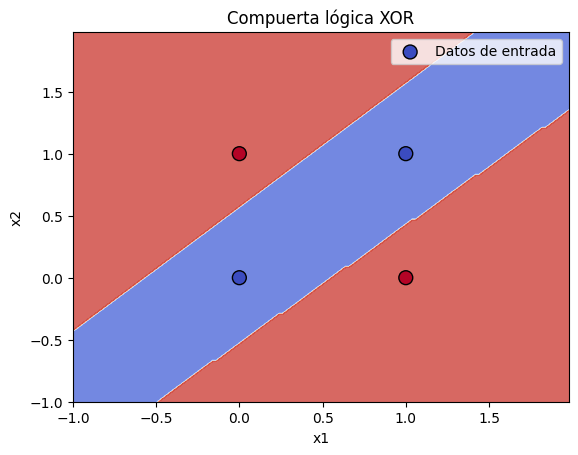

In [5]:
# Función para graficar la frontera de decisión
def plot_decision(model, X, y, h=0.02):
    # Generamos una malla de puntos
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    print(X)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o',label="Datos de entrada", s=100, cmap=plt.cm.coolwarm)
    plt.xlabel("x1")
    plt.ylabel("x2")

# Graficar
plot_decision(nn, inputs, expected_output)
plt.title("Compuerta lógica XOR")
plt.legend()
plt.show()